# HIERARCHICAL CLUSTERING 

In [1]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
data=pd.read_excel("EastWestAirlines.xlsx","data")
data.head(5)

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [4]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [5]:
df_norm = norm_func(data.iloc[:,1:])
df_norm

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0
3995,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0
3996,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0
3997,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0


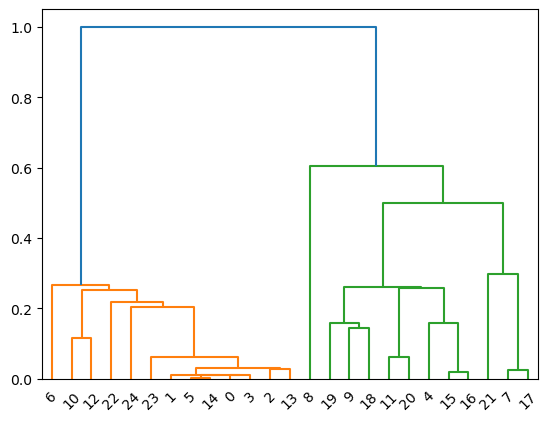

In [6]:
dendrogram = sch.dendrogram(sch.linkage(df_norm.iloc[0:25,:], method='single'))

In [7]:
hcluster = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'single')

In [8]:
pred_hc = hcluster.fit_predict(df_norm)
clusters=pd.DataFrame(pred_hc,columns=["clusters"])
clusters

,clusters
0,1
1,1
2,1
3,1
4,0
...,...
3994,0
3995,0
3996,0
3997,1


In [9]:
final_df=pd.concat([data["ID#"],df_norm,clusters],axis=1)
final_df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusters
0,1,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0,1
1,2,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0,1
2,3,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0,1
3,4,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0,1
4,5,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0,0
3995,4018,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0,0
3996,4019,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0,0
3997,4020,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0,1


<AxesSubplot:xlabel='clusters', ylabel='Count'>

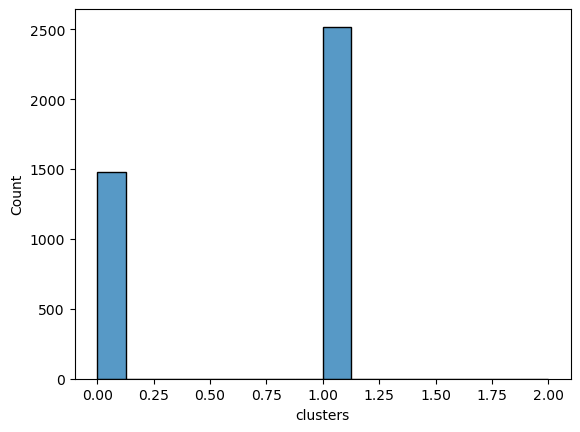

In [10]:
sn.histplot(data=final_df,x="clusters")

In [11]:
final_df["clusters"].value_counts()

1    2518
0    1480
2       1
Name: clusters, dtype: int64

# K MEANS CLUSTERING

In [17]:
from sklearn.cluster import KMeans

In [20]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_data=scaler.fit_transform(data.iloc[:,1:])

In [24]:
scaled_data

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

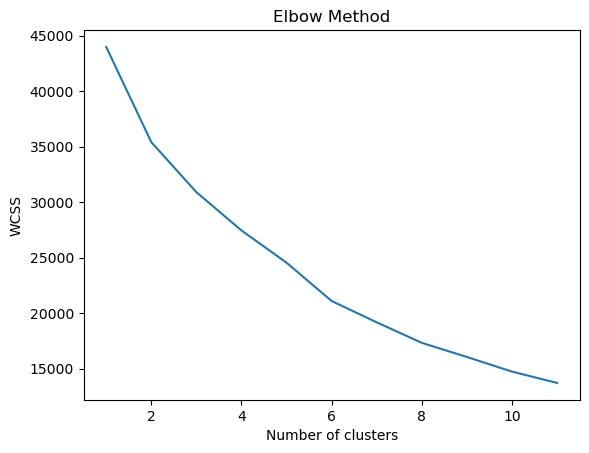

In [31]:
wcss = []
for i in range(1, 12):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 12), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

TAKING K=6 FROM THE ELBOW METHOD

In [32]:
k_cluster=KMeans(n_clusters=6,random_state=42)
k_cluster.fit(scaled_data)

KMeans(n_clusters=6, random_state=42)

In [33]:
k_cluster.labels_

array([2, 2, 2, ..., 0, 2, 2])

In [35]:
data["k_clusters"]=k_cluster.labels_
data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,k_clusters
0,1,28143,0,1,1,1,174,1,0,0,7000,0,2
1,2,19244,0,1,1,1,215,2,0,0,6968,0,2
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,2
3,4,14776,0,1,1,1,500,1,0,0,6952,0,2
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,2
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,2
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,2


<AxesSubplot:xlabel='k_clusters', ylabel='Count'>

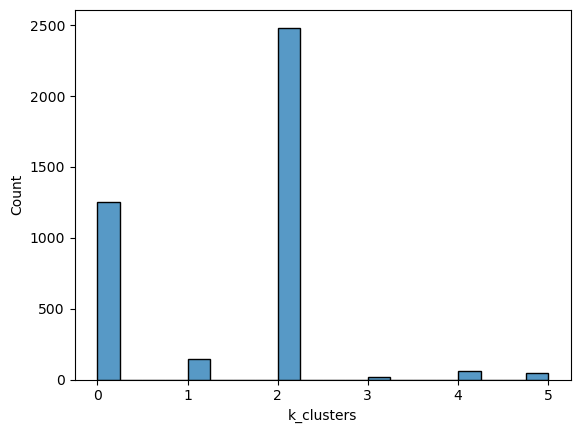

In [41]:
sn.histplot(data=data,x="k_clusters")

In [37]:
data["k_clusters"].value_counts()

2    2483
0    1254
1     143
4      61
5      43
3      15
Name: k_clusters, dtype: int64

# DBSCAN

In [42]:
from sklearn.cluster import DBSCAN

In [51]:
from sklearn.neighbors import NearestNeighbors

In [52]:
neighbors = NearestNeighbors(n_neighbors=12)
neighbors_fit = neighbors.fit(scaled_data)
distances, indices = neighbors_fit.kneighbors(scaled_data)

In [57]:
distances

array([[0.        , 0.11184685, 0.12034246, ..., 0.16026629, 0.16537025,
        0.16805832],
       [0.        , 0.11406276, 0.11437601, ..., 0.21071895, 0.21081947,
        0.21200061],
       [0.        , 0.16540223, 0.19458949, ..., 0.32157448, 0.32480402,
        0.34458561],
       ...,
       [0.        , 0.16614779, 0.28024323, ..., 0.78908622, 0.82258359,
        0.82576078],
       [0.        , 0.25725534, 0.27167409, ..., 0.47071907, 0.47345856,
        0.47811004],
       [0.        , 0.00270574, 0.0112955 , ..., 0.08663803, 0.09020918,
        0.09842868]])

In [ ]:
distances = np.sort(distances, axis=0)

Text(0, 0.5, 'epsilon value ')

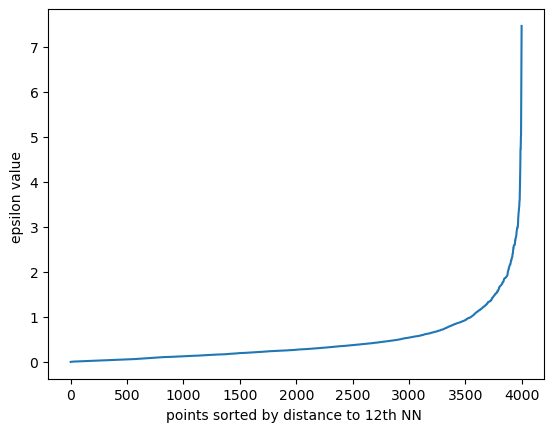

In [66]:
plt.plot(distances)
plt.xlabel("points sorted by distance to 12th NN ")
plt.ylabel("epsilon value ")

TAKING EPSILON VALUE 2 REFERRING THE MAXIMUM CURVATURE ON THE ABOVE GRAPH

In [47]:
db_cluster=DBSCAN(eps=2,min_samples=12)
db_cluster.fit(scaled_data)

DBSCAN(eps=2, min_samples=12)

In [48]:
db_cluster.labels_

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [49]:
data["db_cluster"]=db_cluster.labels_
data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,k_clusters,db_cluster
0,1,28143,0,1,1,1,174,1,0,0,7000,0,2,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,2,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,2,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,2,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,2,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,2,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,2,0


<AxesSubplot:xlabel='db_cluster', ylabel='Count'>

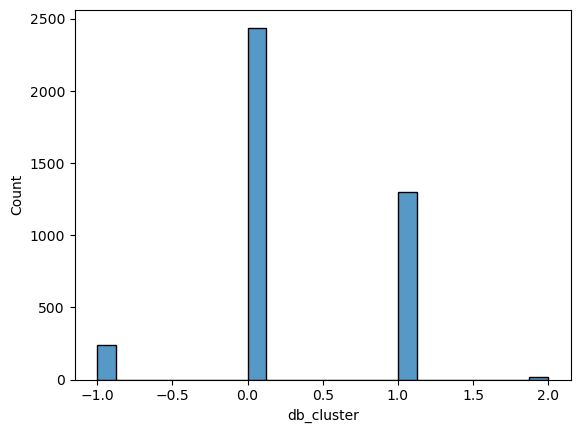

In [65]:
sn.histplot(data=data,x="db_cluster")

In [50]:
data["db_cluster"].value_counts()

 0    2440
 1    1302
-1     241
 2      16
Name: db_cluster, dtype: int64